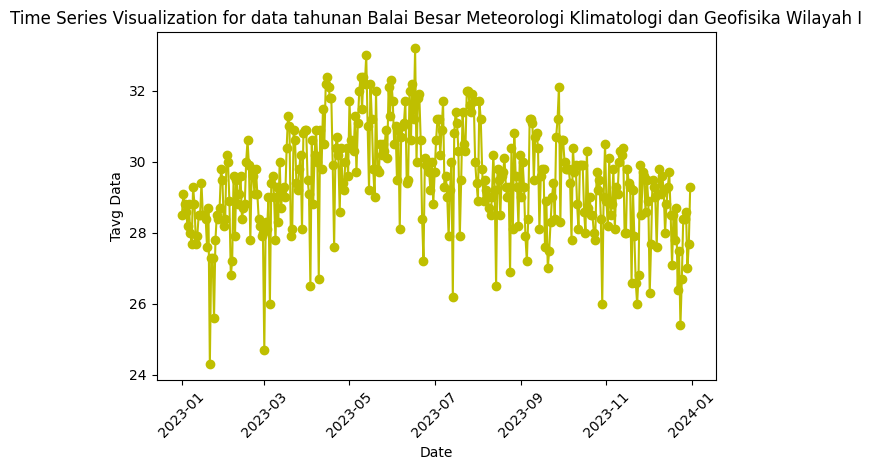

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data_lengkap.xlsx'
df = pd.read_excel(file_path)

time_series_data = df.iloc[0, 5:]
dates = df.columns[5:]

dates = pd.to_datetime(dates, dayfirst=True)
plt.plot(dates, time_series_data, marker='o', color='y')

plt.ylim()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Tavg Data')
plt.title(f'Time Series Visualization for data tahunan{df.iloc[0,1]}')
plt.tight_layout()

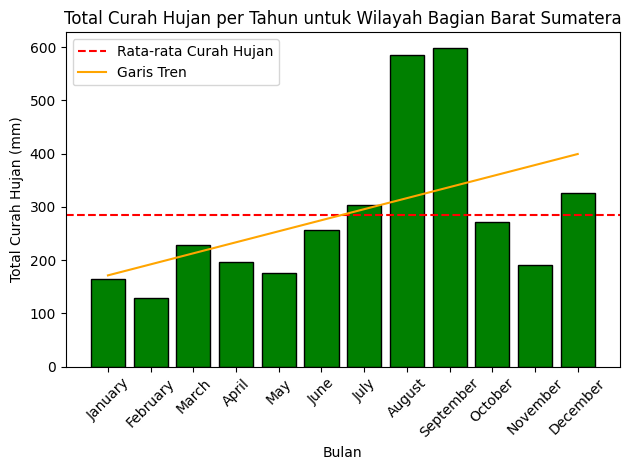

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca sheet yang berisi data RR
file_path = 'data_lengkap.xlsx'
df = pd.read_excel(file_path, sheet_name='RR')  # Pastikan sheet_name='RR'

# Ambil data curah hujan (RR) dan tanggal
time_series_data = df.iloc[0, 5:].astype(float)  # Pastikan data diubah menjadi float
dates = df.columns[5:]  # Ambil kolom tanggal (diasumsikan mulai dari kolom ke-6)

# Konversi kolom tanggal menjadi format datetime
dates = pd.to_datetime(dates, dayfirst=True)

# Ganti nilai 8888 dengan NaN, lalu hapus NaN
time_series_data.replace(8888, np.nan, inplace=True)
valid_data_mask = ~time_series_data.isna()  # Masker boolean untuk nilai yang valid
valid_time_series_data = time_series_data[valid_data_mask]  # Data curah hujan yang valid
valid_dates = dates[valid_data_mask]  # Tanggal yang sesuai dengan data yang valid

# Mengelompokkan data berdasarkan bulan
monthly_rainfall = valid_time_series_data.groupby(valid_dates.month).sum()

# Mengonversi nomor bulan ke nama bulan
month_names = monthly_rainfall.index.map(lambda x: pd.Timestamp(f'2023-{x}-01').strftime('%B'))

# Hitung rata-rata curah hujan
average_rainfall = monthly_rainfall.mean()

# Plot histogram curah hujan per bulan
plt.bar(month_names, monthly_rainfall, color='g', edgecolor='black')

# Tambahkan garis rata-rata
plt.axhline(y=average_rainfall, color='r', linestyle='--', label='Rata-rata Curah Hujan')

# Hitung garis tren
x = np.arange(len(month_names))  # Array untuk sumbu x (0, 1, 2, ..., n)
z = np.polyfit(x, monthly_rainfall, 1)  # Regresi linear (derajat 1)
p = np.poly1d(z)  # Buat fungsi polinomial dari hasil regresi
plt.plot(month_names, p(x), color='orange', linestyle='-', label='Garis Tren')

# Atur label dan judul plot
plt.ylabel('Total Curah Hujan (mm)')
plt.xlabel('Bulan')
plt.title(f'Total Curah Hujan per Tahun untuk Wilayah Bagian Barat Sumatera')  # Nama stasiun atau metadata lain

# Atur layout agar tidak overlapping
plt.xticks(rotation=45)  # Rotasi label bulan
plt.tight_layout()

# Tambahkan legend
plt.legend()

# Tampilkan plot
plt.show()



C:\Users\asus\AppData\Local\Temp\ipykernel_2868\3887766202.py:31: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  quartile_data_interpolated = quartile_data.interpolate(method='linear')


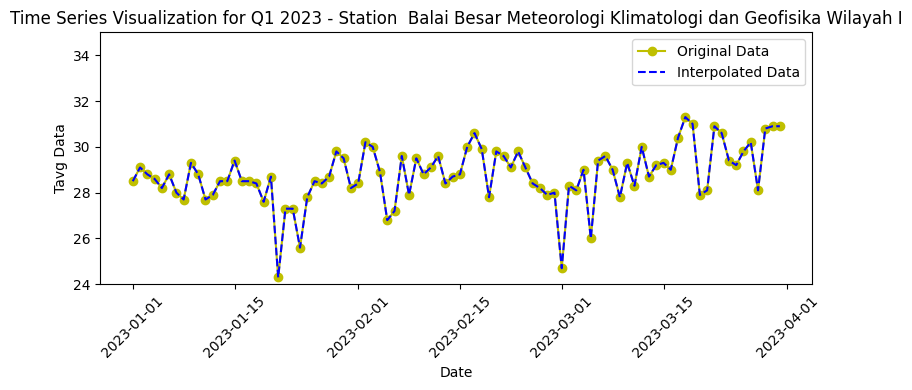

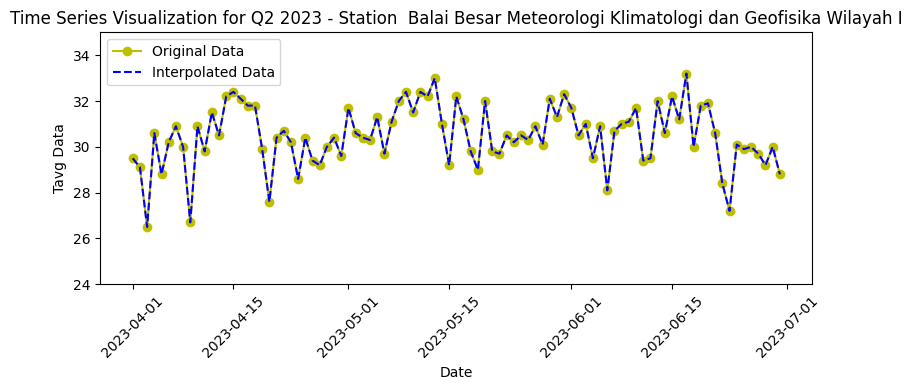

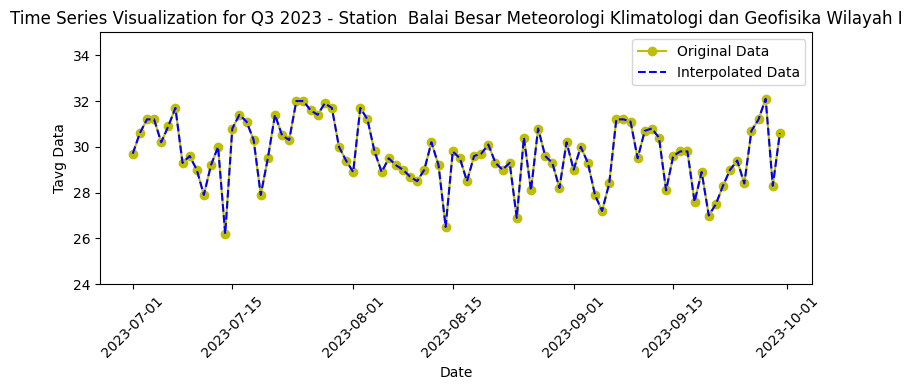

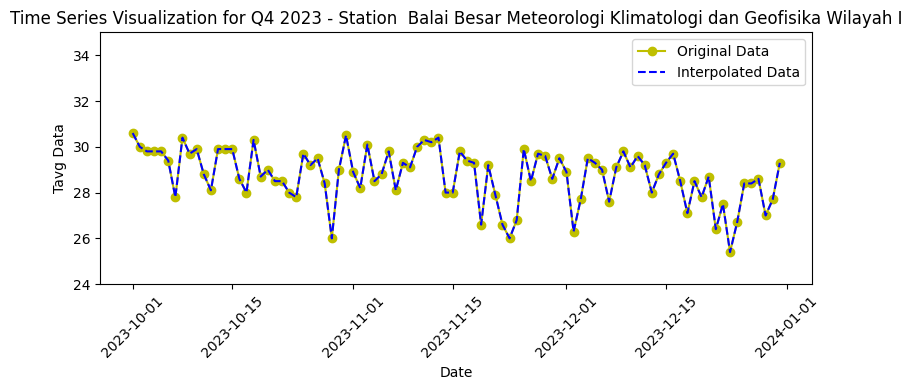

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file Excel
file_path = 'data_lengkap.xlsx'
df = pd.read_excel(file_path)

# Mengambil data deret waktu mulai dari kolom ke-6 (kolom tanggal)
time_series_data = df.iloc[0, 5:]
dates = df.columns[5:]

# Mengonversi kolom tanggal ke format datetime
dates = pd.to_datetime(dates, dayfirst=True)

# Membagi data ke dalam 4 kuartil (Q1, Q2, Q3, Q4)
quartile_indices = [
    (dates >= '2023-01-01') & (dates <= '2023-03-31'),  # Q1
    (dates >= '2023-04-01') & (dates <= '2023-06-30'),  # Q2
    (dates >= '2023-07-01') & (dates <= '2023-09-30'),  # Q3
    (dates >= '2023-10-01') & (dates <= '2023-12-31')   # Q4
]

quartile_names = ['Q1', 'Q2', 'Q3', 'Q4']

# Membuat plot untuk setiap kuartil
for i, quartile in enumerate(quartile_indices):
    quartile_dates = dates[quartile]
    quartile_data = time_series_data[quartile]

    # Interpolasi linear
    quartile_data_interpolated = quartile_data.interpolate(method='linear')

    plt.figure(figsize=(8, 4))

    # Plot data asli (sebelum interpolasi)
    plt.plot(quartile_dates, quartile_data, marker='o', linestyle='-', color='y', label='Original Data')

    # Plot data setelah interpolasi
    plt.plot(quartile_dates, quartile_data_interpolated, marker='', linestyle='--', color='b', label='Interpolated Data')

    plt.ylim(24, 35)
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Tavg Data')
    plt.title(f'Time Series Visualization for {quartile_names[i]} 2023 - Station {df.iloc[0,1]}')
    plt.legend()  # Menambahkan legenda untuk membedakan data asli dan interpolasi
    plt.tight_layout()
    plt.show()


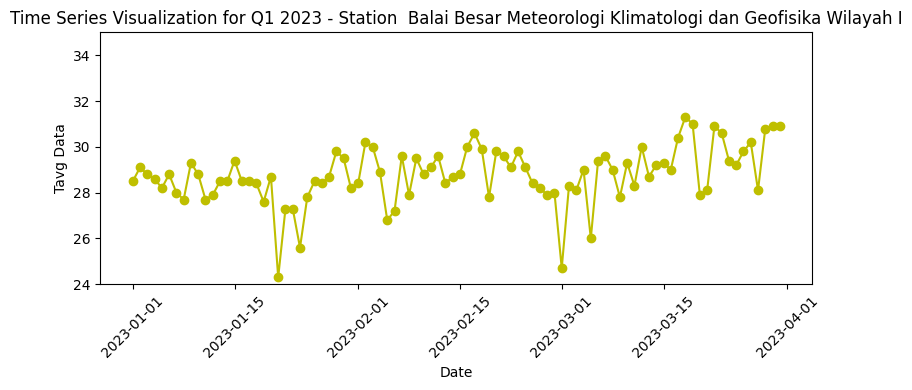

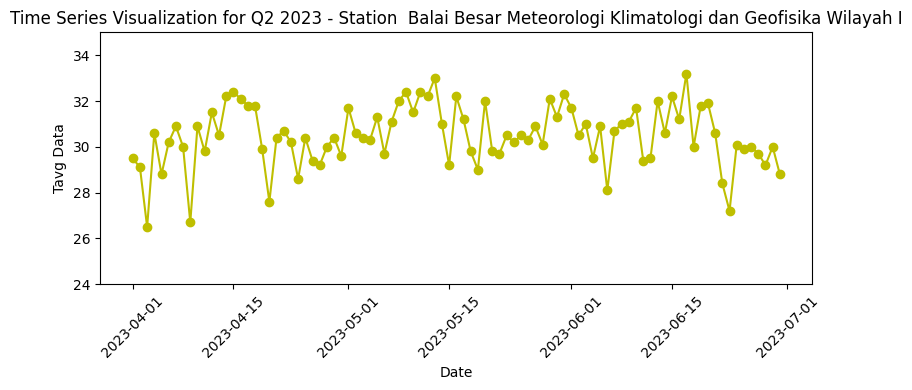

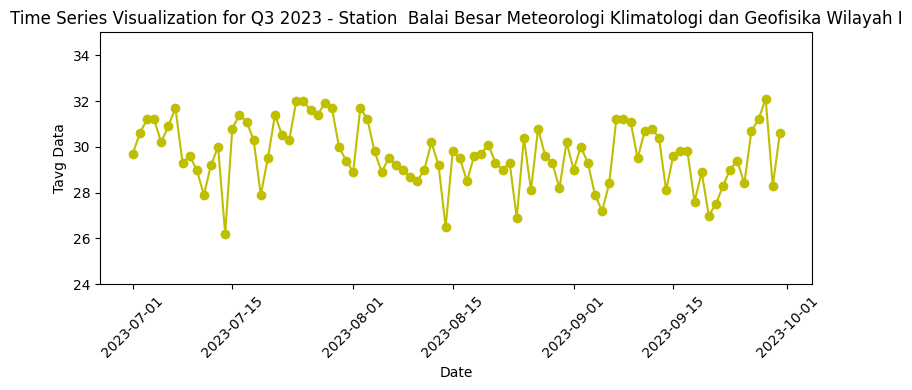

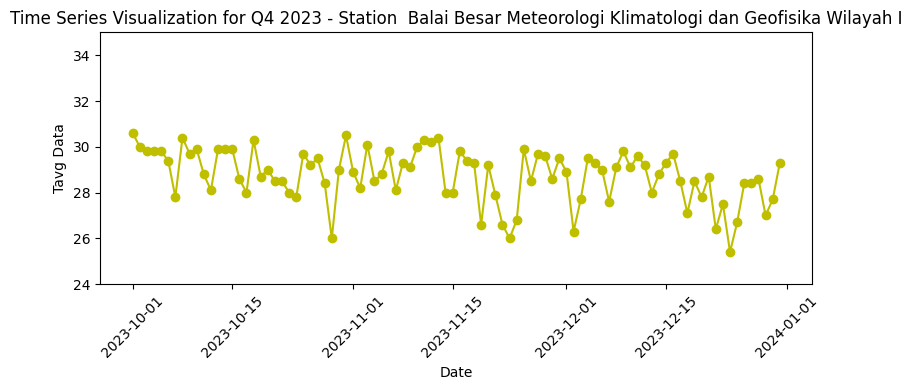

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file Excel
file_path = 'data_lengkap.xlsx'
df = pd.read_excel(file_path)

# Mengambil data deret waktu mulai dari kolom ke-6 (kolom tanggal)
time_series_data = df.iloc[0, 5:]
dates = df.columns[5:]

# Mengonversi kolom tanggal ke format datetime
dates = pd.to_datetime(dates, dayfirst=True)

# Membagi data ke dalam 4 kuartil (Q1, Q2, Q3, Q4)
quartile_indices = [
    (dates >= '2023-01-01') & (dates <= '2023-03-31'),  # Q1
    (dates >= '2023-04-01') & (dates <= '2023-06-30'),  # Q2
    (dates >= '2023-07-01') & (dates <= '2023-09-30'),  # Q3
    (dates >= '2023-10-01') & (dates <= '2023-12-31')   # Q4
]

quartile_names = ['Q1', 'Q2', 'Q3', 'Q4']

# Membuat plot untuk setiap kuartil
for i, quartile in enumerate(quartile_indices):
    quartile_dates = dates[quartile]
    quartile_data = time_series_data[quartile]
    
    plt.figure(figsize=(8, 4))
    plt.plot(quartile_dates, quartile_data, marker='o', color='y')
    
    plt.ylim(24,35)
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Tavg Data')
    plt.title(f'Time Series Visualization for {quartile_names[i]} 2023 - Station {df.iloc[0,1]}')
    plt.tight_layout()
    plt.show()

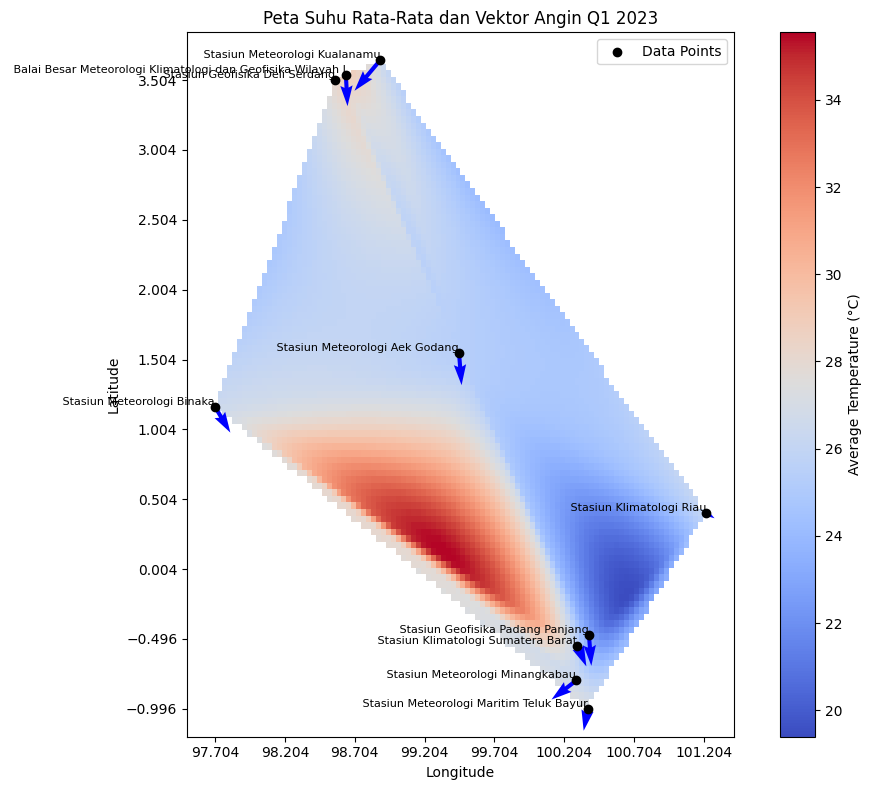

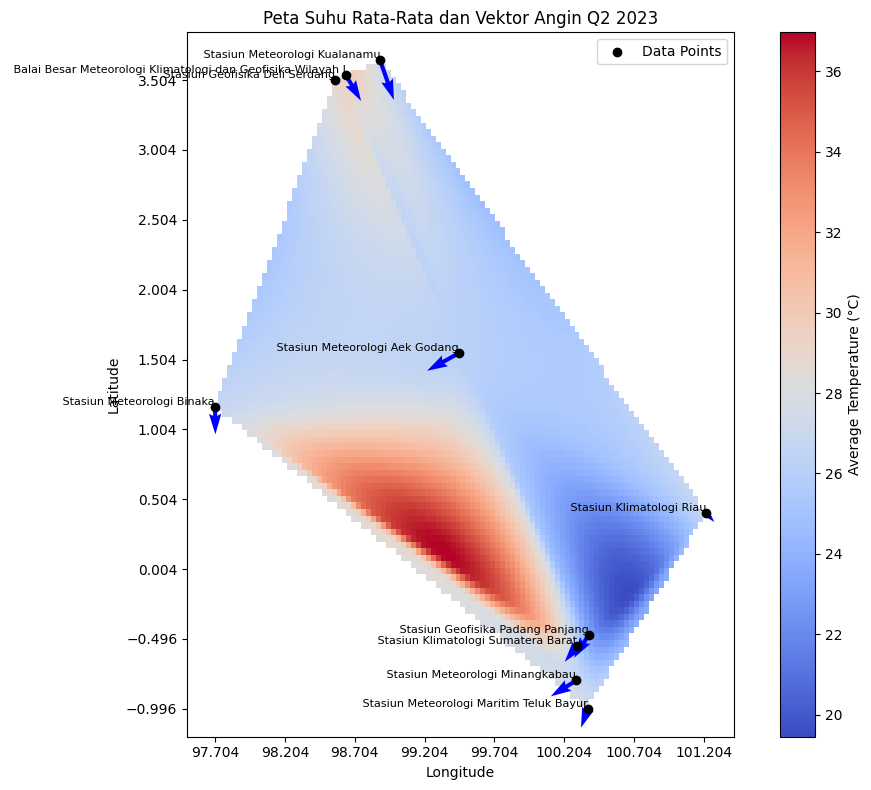

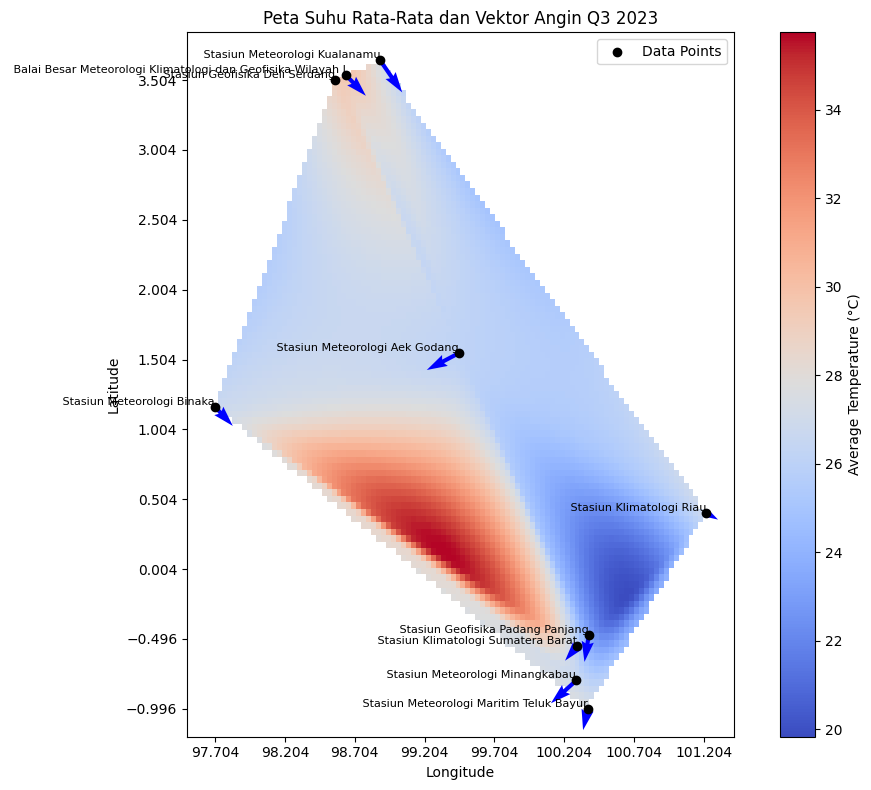

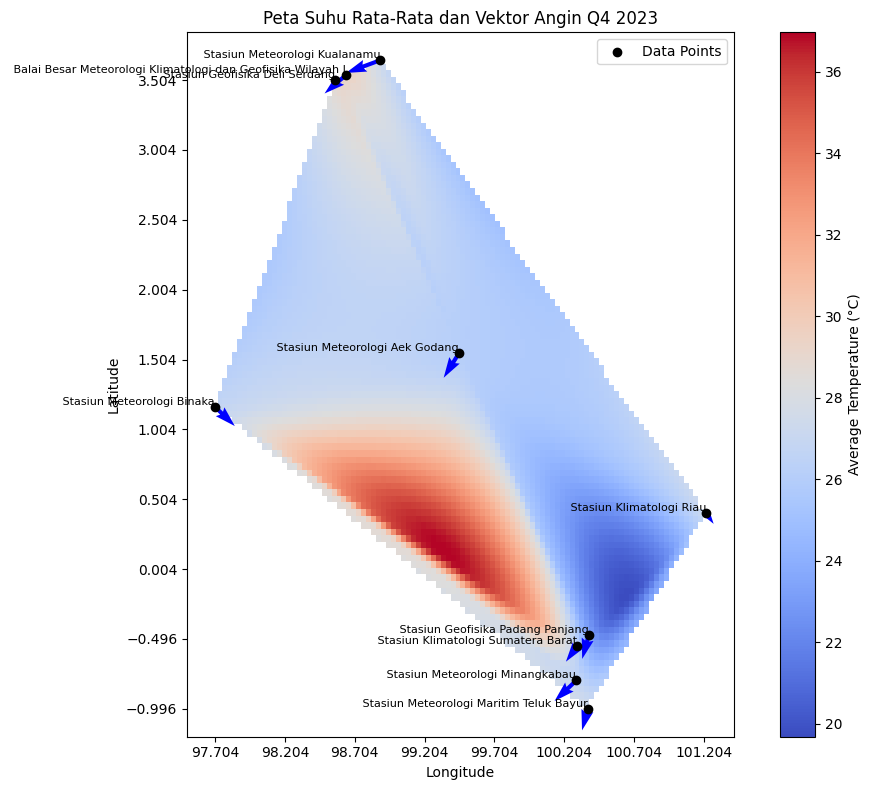

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Membaca data dari file Excel
file_path = 'data_lengkap.xlsx'


df1 = pd.read_excel(file_path, 'Tavg')
df2 = pd.read_excel(file_path, 'ff_x')
df3 = pd.read_excel(file_path, 'ddd_x')


# Mengambil kolom latitude, longitude, dan station_name sebelum mengubah nama kolom menjadi tanggal
latitudes = df1['latitude']
longitudes = df1['longitude']
station_names = df1['station_name']

# Mengonversi kolom menjadi format datetime
df1.columns = pd.to_datetime(df1.columns, format='%d-%m-%Y', errors='coerce')

# Menghapus kolom yang tidak dapat dikonversi menjadi tanggal
df1 = df1.loc[:, df1.columns.notnull()]

# Menghitung suhu rata-rata untuk setiap quartil
quartiles = {
    'Q1': df1.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df1.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df1.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df1.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_speeds_quartiles = {
    'Q1': df2.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df2.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df2.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df2.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_directions_quartiles = {
    'Q1': df3.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df3.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df3.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df3.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

# Loop untuk menggabungkan data suhu, kecepatan angin, dan arah angin per kuartal
for quartile in quartiles.keys():  # Mengiterasi hanya kunci dari dictionary
    # Ambil data suhu, kecepatan angin, dan arah angin untuk kuartal tersebut
    tavg = np.array(quartiles[quartile])  # Mengambil suhu untuk kuartal saat ini
    wsx = np.array(wind_speeds_quartiles[quartile])  # Mengambil kecepatan angin untuk kuartal saat ini
    wdx = np.array(np.radians(wind_directions_quartiles[quartile]))  # Mengambil arah angin dalam radian

    # Konversi arah angin dari derajat ke radian (Tambahan)
    wind_directions_rad = np.radians(wind_directions_quartiles[quartile])

    lat = np.array(latitudes)
    lon = np.array(longitudes)
    station_names = np.array(station_names)

    # Memilih data yang valid (tidak ada NaN)
    valid_indices = ~np.isnan(tavg)
    lat = lat[valid_indices]
    lon = lon[valid_indices]
    tavg = tavg[valid_indices]
    wsx = wsx[valid_indices]
    wdx = wdx[valid_indices]
    station_names_valid = station_names[valid_indices]

    # Hitung komponen u dan v untuk angin
    u = wsx * np.sin(wdx)
    v = wsx * np.cos(wdx)

    # Selanjutnya, bisa memasukkan visualisasi grafik, misalnya pcolormesh untuk suhu
    # dan quiver untuk angin
    plt.figure(figsize=(10, 8))

    # Misal menambahkan suhu dengan interpolasi
    grid_x, grid_y = np.mgrid[min(lon):max(lon):100j, min(lat):max(lat):100j]
    grid_tavg = griddata((lon, lat), tavg, (grid_x, grid_y), method='cubic')

    # Membuat plot suhu
    plt.pcolormesh(grid_x, grid_y, grid_tavg, shading='auto', cmap='coolwarm')
    plt.colorbar(label='Average Temperature (°C)')

    # Tambahkan vektor angin
    plt.quiver(lon, lat, u, v, angles='xy', scale_units='xy', scale=20, color='blue')

    # Tambahkan stasiun pengukuran
    plt.scatter(lon, lat, color='black', marker='o', label='Data Points')

    # Tambahkan nama stasiun
    for i in range(len(lat)):
        plt.text(lon[i], lat[i], station_names_valid[i], fontsize=8, ha='right', va='bottom')


    # Atur plot
    ax = plt.gca()
    ax.set_xlim([min(lon) - 0.2, max(lon) + 0.2])  # Set the x-axis limits with some padding
    ax.set_ylim([min(lat) - 0.2, max(lat) + 0.2])  # Set the y-axis limits with some padding
    ax.set_xticks(np.arange(min(lon), max(lon), 0.5))  # Set the x-axis ticks
    ax.set_yticks(np.arange(min(lat), max(lat), 0.5))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Peta Suhu Rata-Rata dan Vektor Angin {quartile} 2023')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


<Figure size 1200x800 with 0 Axes>

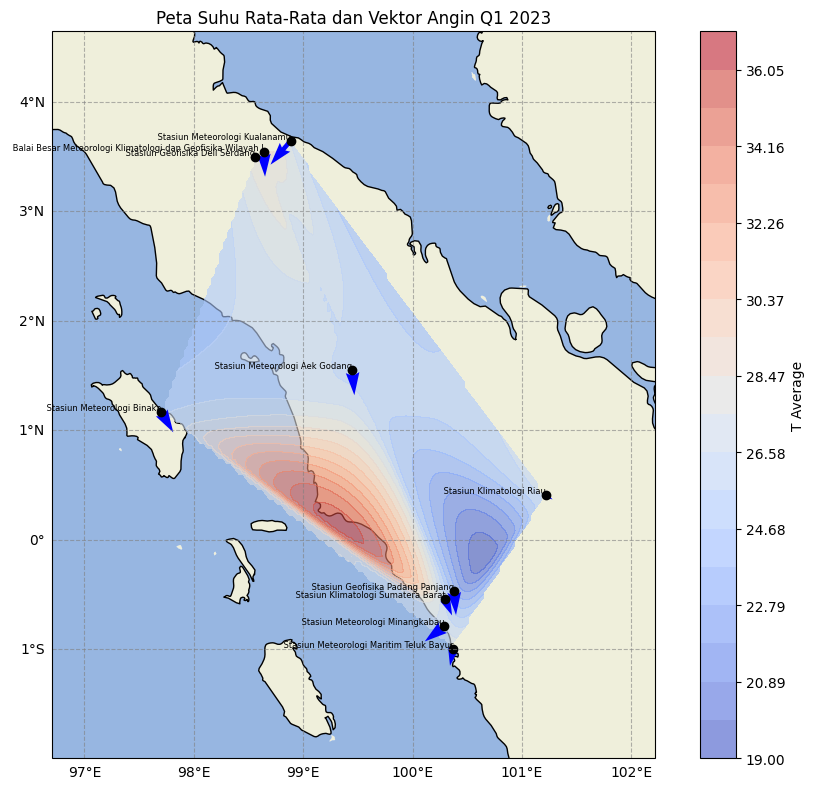

<Figure size 1200x800 with 0 Axes>

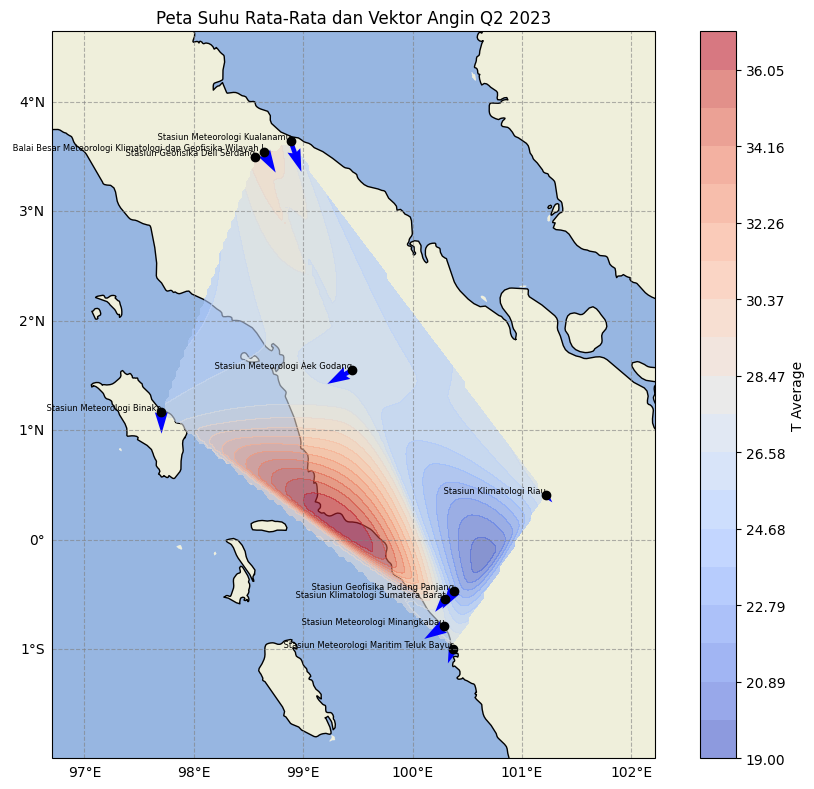

<Figure size 1200x800 with 0 Axes>

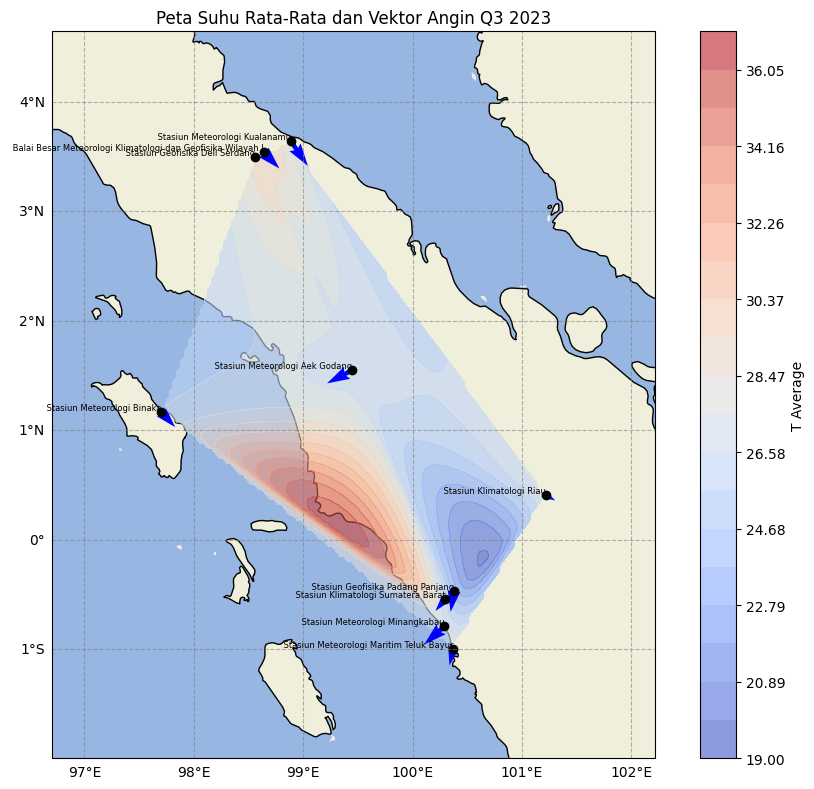

<Figure size 1200x800 with 0 Axes>

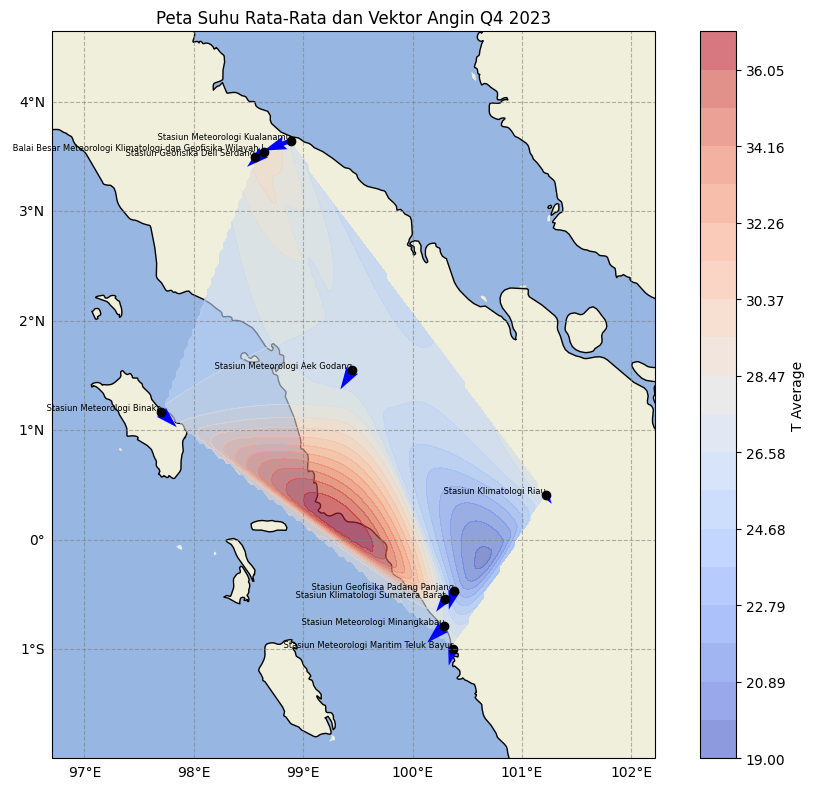

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file Excel
file_path = 'data_lengkap.xlsx'

df1 = pd.read_excel(file_path, 'Tavg')
df2 = pd.read_excel(file_path, 'ff_x')
df3 = pd.read_excel(file_path, 'ddd_x')

# Mengambil kolom latitude, longitude, dan station_name
latitudes = df1['latitude']
longitudes = df1['longitude']
station_names = df1['station_name']

# Mengonversi kolom menjadi format datetime
df1.columns = pd.to_datetime(df1.columns, format='%d-%m-%Y', errors='coerce')

# Menghapus kolom yang tidak dapat dikonversi menjadi tanggal
df1 = df1.loc[:, df1.columns.notnull()]

# Menghitung suhu rata-rata untuk setiap kuartal
quartiles = {
    'Q1': df1.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df1.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df1.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df1.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_speeds_quartiles = {
    'Q1': df2.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df2.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df2.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df2.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_directions_quartiles = {
    'Q1': df3.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df3.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df3.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df3.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

# Tetapkan levels secara manual untuk memastikan konsistensi di setiap plot
levels = np.linspace(19, 37, 20)  # 20 levels antara 19 hingga 37 derajat

# Loop untuk menggabungkan data suhu, kecepatan angin, dan arah angin per kuartal
for quartile in quartiles.keys():
    tavg = quartiles[quartile].to_numpy()
    wsx = wind_speeds_quartiles[quartile].to_numpy()
    wdx = np.radians(wind_directions_quartiles[quartile].to_numpy())

    lat = latitudes.to_numpy()
    lon = longitudes.to_numpy()
    station_names_valid = station_names.to_numpy()

    # Memilih data yang valid (tidak ada NaN)
    valid_indices = ~np.isnan(tavg)
    lat = lat[valid_indices]
    lon = lon[valid_indices]
    tavg = tavg[valid_indices]
    wsx = wsx[valid_indices]
    wdx = wdx[valid_indices]
    station_names_valid = station_names_valid[valid_indices]

    # Hitung komponen u dan v untuk angin
    u = wsx * np.sin(wdx)
    v = wsx * np.cos(wdx)

    plt.figure(figsize=(12, 8))

    # Misal menambahkan suhu dengan interpolasi
    grid_x, grid_y = np.mgrid[min(lon):max(lon):100j, min(lat):max(lat):100j]
    grid_tavg = griddata((lon, lat), tavg, (grid_x, grid_y), method='cubic')

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    ax.add_feature(cfeature.LAND, zorder=1)
    ax.add_feature(cfeature.OCEAN, zorder=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=1)
    ax.add_feature(cfeature.COASTLINE, zorder=1)

    # Set extent menggunakan nilai min/max dari longitude dan latitude
    ax.set_extent([min(lon)-1, max(lon)+1, min(lat)-1, max(lat)+1], crs=ccrs.PlateCarree())

    contour = ax.contourf(grid_x, grid_y, grid_tavg, levels=levels, cmap='coolwarm', alpha=0.6, vmin=19, vmax=37, transform=ccrs.PlateCarree())

    ax.scatter(lon, lat, color='black', marker='o', label='Data Points', transform=ccrs.PlateCarree(), zorder=2)
    cbar = plt.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('T Average')
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.6)
    gl.right_labels = False
    gl.top_labels = False

    # Tambahkan vektor angin
    plt.quiver(lon, lat, u, v, angles='xy', scale_units='xy', scale=20, color='blue')

    # Tambahkan nama stasiun dengan ukuran font lebih kecil untuk menghindari tumpang tindih
    for i in range(len(lat)):
        plt.text(lon[i], lat[i], station_names_valid[i], fontsize=6, ha='right', va='bottom')

    # Atur plot
    plt.title(f'Peta Suhu Rata-Rata dan Vektor Angin {quartile} 2023')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()



<Figure size 1200x800 with 0 Axes>

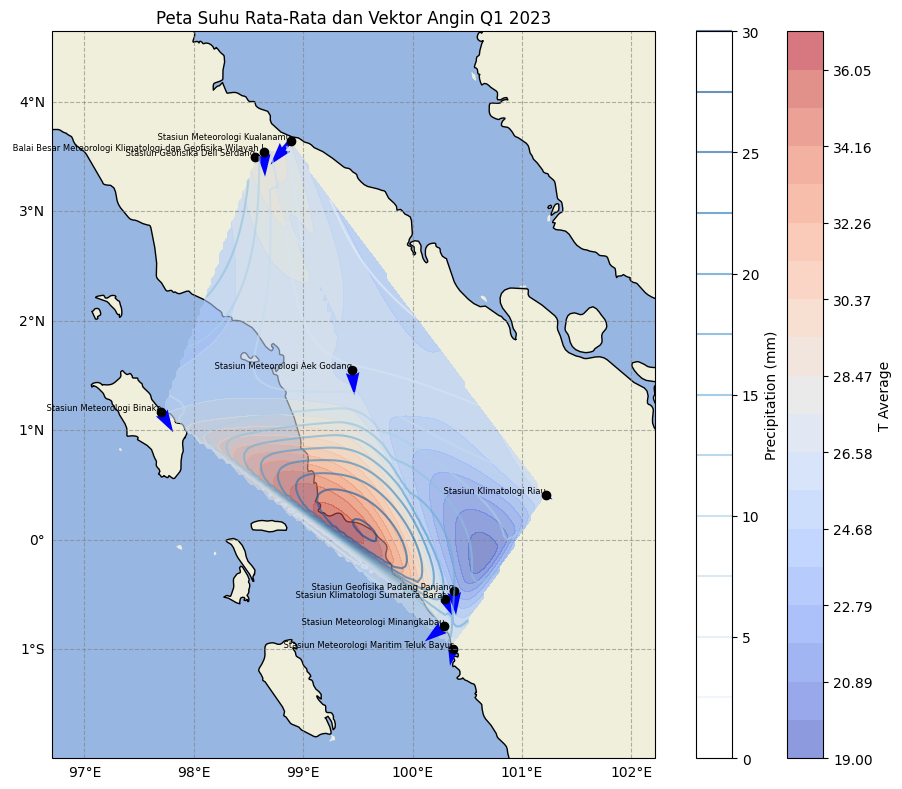

<Figure size 1200x800 with 0 Axes>

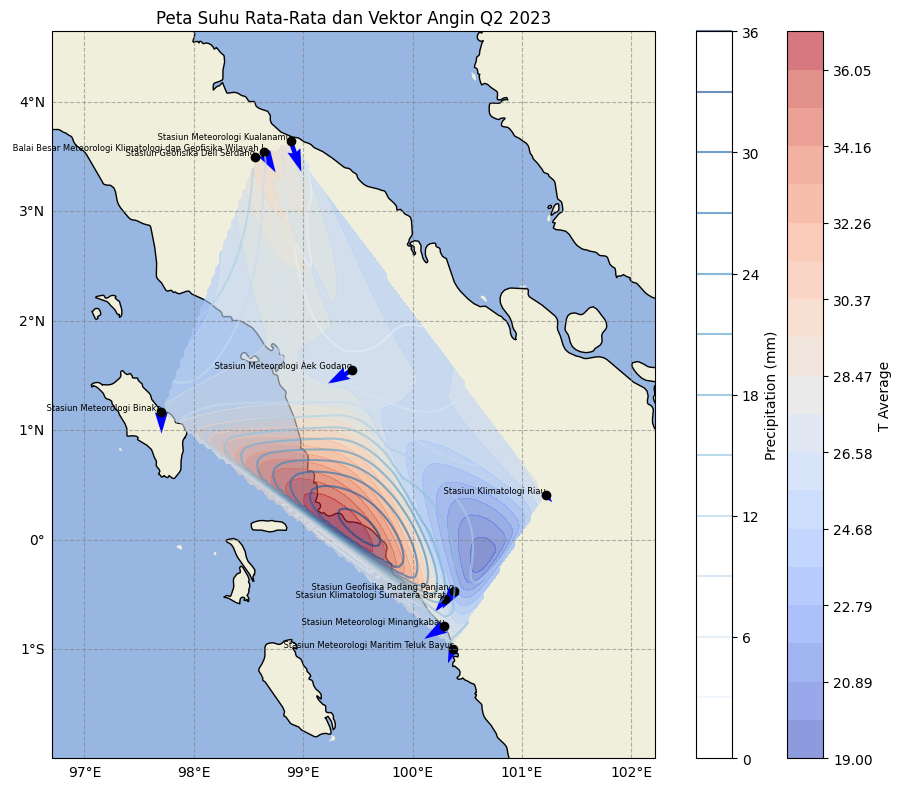

<Figure size 1200x800 with 0 Axes>

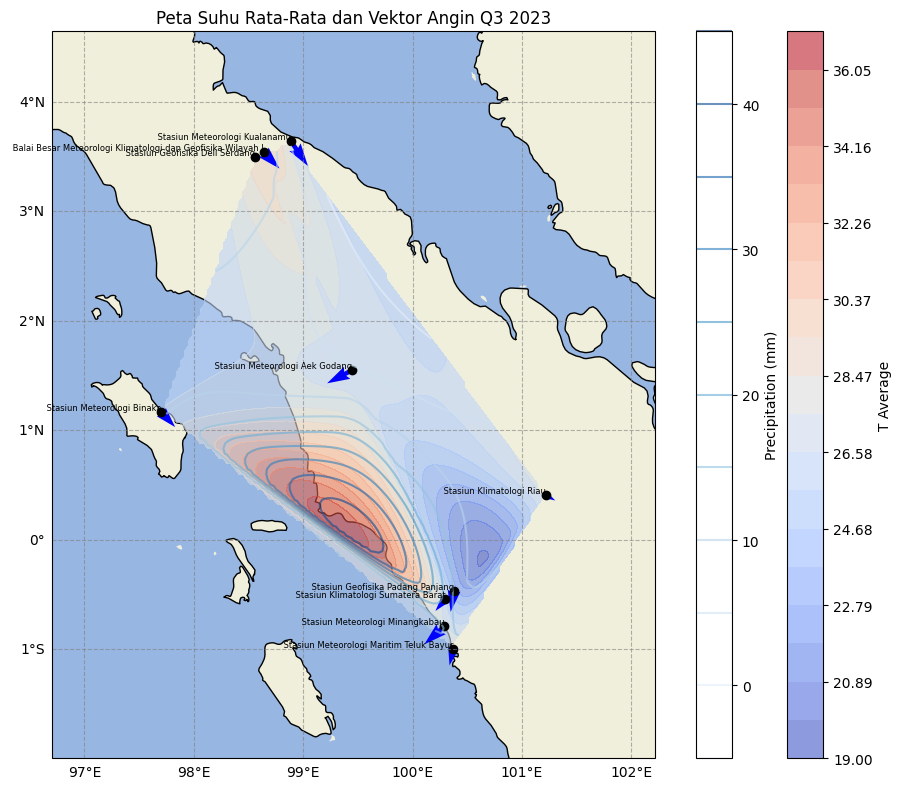

<Figure size 1200x800 with 0 Axes>

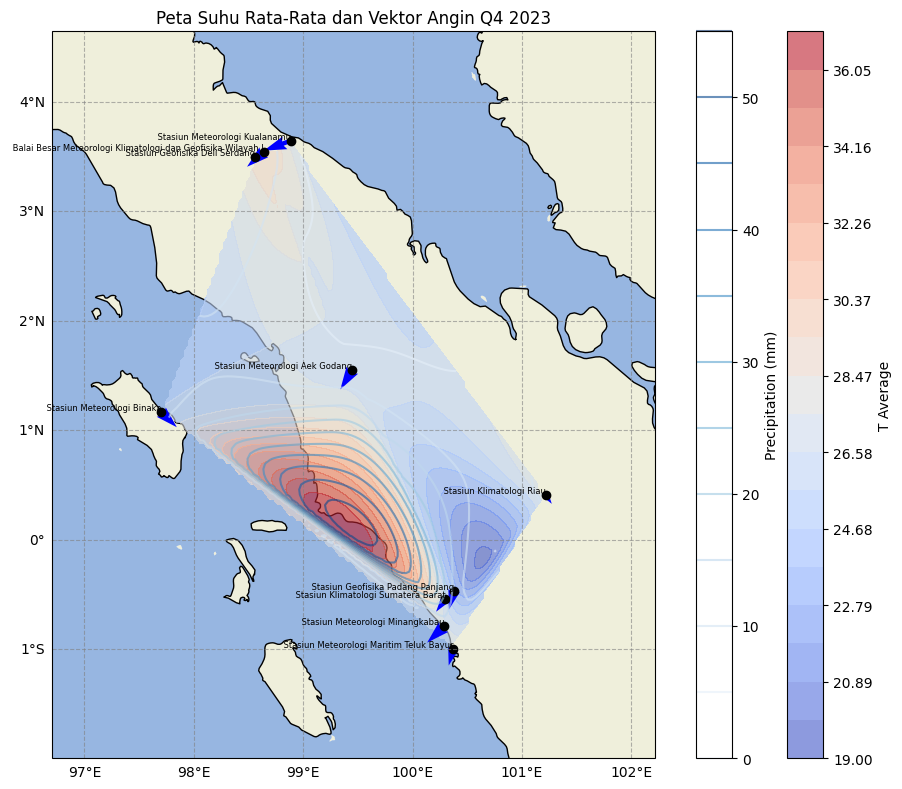

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file Excel
file_path = 'data_lengkap.xlsx'

df1 = pd.read_excel(file_path, 'Tavg')
df2 = pd.read_excel(file_path, 'ff_x')
df3 = pd.read_excel(file_path, 'ddd_x')
df4 = pd.read_excel(file_path, 'RR')

# Mengambil kolom latitude, longitude, dan station_name
latitudes = df1['latitude']
longitudes = df1['longitude']
station_names = df1['station_name']

# Mengonversi kolom menjadi format datetime
df1.columns = pd.to_datetime(df1.columns, format='%d-%m-%Y', errors='coerce')
df4.columns = pd.to_datetime(df4.columns, format='%d-%m-%Y', errors='coerce')  # Untuk curah hujan
# Menghapus kolom yang tidak dapat dikonversi menjadi tanggal
df1 = df1.loc[:, df1.columns.notnull()]
df4 = df4.loc[:, df4.columns.notnull()]  # Untuk curah hujan

# Ganti nilai 8888 dengan NaN pada data curah hujan
df4.replace(8888, np.nan, inplace=True)

# Menghitung suhu rata-rata untuk setiap kuartal
quartiles = {
    'Q1': df1.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df1.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df1.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df1.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

rr_quartiles = {
    'Q1': df4.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df4.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df4.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df4.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_speeds_quartiles = {
    'Q1': df2.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df2.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df2.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df2.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

wind_directions_quartiles = {
    'Q1': df3.loc[:, '01-01-2023':'31-03-2023'].mean(axis=1),
    'Q2': df3.loc[:, '01-04-2023':'30-06-2023'].mean(axis=1),
    'Q3': df3.loc[:, '01-07-2023':'30-09-2023'].mean(axis=1),
    'Q4': df3.loc[:, '01-10-2023':'31-12-2023'].mean(axis=1),
}

# Tetapkan levels secara manual untuk memastikan konsistensi di setiap plot
levels = np.linspace(19, 37, 20)  # 20 levels antara 19 hingga 37 derajat

# Loop untuk menggabungkan data suhu, kecepatan angin, dan arah angin per kuartal
for quartile in quartiles.keys():
    tavg = quartiles[quartile].to_numpy()
    rr = rr_quartiles[quartile].to_numpy()
    wsx = wind_speeds_quartiles[quartile].to_numpy()
    wdx = np.radians(wind_directions_quartiles[quartile].to_numpy())

    lat = latitudes.to_numpy()
    lon = longitudes.to_numpy()
    station_names_valid = station_names.to_numpy()

    # Memilih data yang valid (tidak ada NaN)
    valid_indices = ~np.isnan(tavg) & ~np.isnan(rr) & ~np.isnan(wsx)
    lat = lat[valid_indices]
    lon = lon[valid_indices]
    tavg = tavg[valid_indices]
    rr = rr[valid_indices]
    wsx = wsx[valid_indices]
    wdx = wdx[valid_indices]
    station_names_valid = station_names_valid[valid_indices]

    # Hitung komponen u dan v untuk angin
    u = wsx * np.sin(wdx)
    v = wsx * np.cos(wdx)

    plt.figure(figsize=(12, 8))

    # Misal menambahkan suhu dengan interpolasi
    grid_x, grid_y = np.mgrid[min(lon):max(lon):100j, min(lat):max(lat):100j]
    grid_tavg = griddata((lon, lat), tavg, (grid_x, grid_y), method='cubic')

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    ax.add_feature(cfeature.LAND, zorder=1)
    ax.add_feature(cfeature.OCEAN, zorder=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=1)
    ax.add_feature(cfeature.COASTLINE, zorder=1)

    # Set extent menggunakan nilai min/max dari longitude dan latitude
    ax.set_extent([min(lon)-1, max(lon)+1, min(lat)-1, max(lat)+1], crs=ccrs.PlateCarree())

    contour = ax.contourf(grid_x, grid_y, grid_tavg, levels=levels, cmap='coolwarm', alpha=0.6, vmin=19, vmax=37, transform=ccrs.PlateCarree())

    ax.scatter(lon, lat, color='black', marker='o', label='Data Points', transform=ccrs.PlateCarree(), zorder=2)
    cbar = plt.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('T Average')
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.6)
    gl.right_labels = False
    gl.top_labels = False

    # Tambahkan vektor angin
    plt.quiver(lon, lat, u, v, angles='xy', scale_units='xy', scale=20, color='blue')

    # Plot curah hujan sebagai contour tambahan
    grid_rr = griddata((lon, lat), rr, (grid_x, grid_y), method='cubic')
    contour_rr = ax.contour(grid_x, grid_y, grid_rr, levels=10, cmap='Blues', alpha=0.6, transform=ccrs.PlateCarree())
    cbar_rr = plt.colorbar(contour_rr, ax=ax, fraction=0.046, pad=0.04)
    cbar_rr.set_label('Precipitation (mm)')

    # Tambahkan nama stasiun dengan ukuran font lebih kecil untuk menghindari tumpang tindih
    for i in range(len(lat)):
        plt.text(lon[i], lat[i], station_names_valid[i], fontsize=6, ha='right', va='bottom')

    # Atur plot
    plt.title(f'Peta Suhu Rata-Rata dan Vektor Angin {quartile} 2023')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()



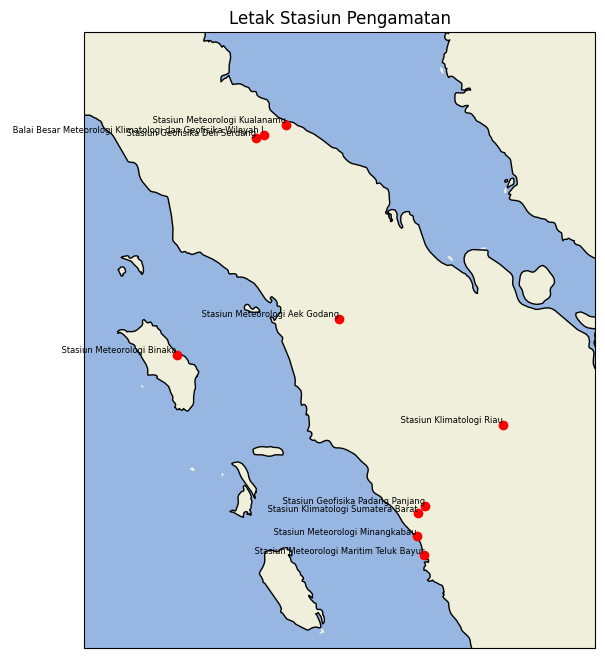

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file Excel
file_path = 'data_lengkap.xlsx'

df1 = pd.read_excel(file_path, 'Tavg')

# Mengambil kolom latitude, longitude, dan station_name
latitudes = df1['latitude']
longitudes = df1['longitude']
station_names = df1['station_name']

# Membuat plot peta stasiun
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Menambahkan fitur geografis
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=1)
ax.add_feature(cfeature.COASTLINE, zorder=1)

# Menentukan rentang peta menggunakan nilai min/max dari longitude dan latitude
ax.set_extent([min(longitudes)-1, max(longitudes)+1, min(latitudes)-1, max(latitudes)+1], crs=ccrs.PlateCarree())

# Menampilkan lokasi stasiun dengan marker
ax.scatter(longitudes, latitudes, color='red', marker='o', label='Stasiun', transform=ccrs.PlateCarree(), zorder=2)

# Tambahkan nama stasiun dengan ukuran font yang kecil
for i in range(len(latitudes)):
    plt.text(longitudes[i], latitudes[i], station_names[i], fontsize=6, ha='right', va='bottom', transform=ccrs.PlateCarree())

# Atur plot
plt.title('Letak Stasiun Pengamatan')
plt.show()
